# Student Performance prediction 

### Life cycle of machine learning project
- Understanding the problem statement.
- Data collection.
- Data checks and perform.
- Exploratory data analysis.
- Data Pre-processing.
- Model Training.
- Choose best model.


### 1) Understanding the problem statement.
- This project understands how the student performance (exam score) is affected by different factores such as gender, ethinicity, lunch type, parent education level

### 2) Data collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 import data and required packages

In [1]:
import pandas as pd 
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("./data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#shape of the dataset
data.shape 

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 2.2 Dataset information
- gender : sex of student -> (male,female)
- race_ethinicity: ethinicity of student -> (A,B,C, D, E groups)
- parental_level_of_education: how much student parent education -> ( bachelor's degree, some college, master's degree, associate's degree, high school, some high school)
- lunch: type of lunch food the eat -> ( standard, free/ reduced)
- test_preparation_course: wheater each student completed their formal test preparation course before exam? -> (none, completed)
- math_score : student got the final marks in math subject (from 0-100)
- reading score : score of student abality of reading text (from 0-100)
- writing score : score of student abality of writing. (from 0-100)

### 3) Data checks to perform
- check missing values
- check outliers
- check duplicats
- check data type 
- check statistic of datset
- check various categories present in the categories columns.

#### 3.1 check missing values

In [6]:
data.isna().mean()

gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

#### 3.2 check duplicates

In [7]:
data.duplicated().sum()

np.int64(0)

#### 3.3 verify the data types 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 check statistic of datset

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insigts
- from above description of numeric data, all means are very close to each other (66-69) 
- all standard deviation are also very close ~15
the min of maths is 0 where the reading score have 17 mininum value.

#### 3.7 Exploring the data

In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for col in data.columns:
    print(f'{col} have total :- {data[col].nunique()} categories')

gender have total :- 2 categories
race_ethnicity have total :- 5 categories
parental_level_of_education have total :- 6 categories
lunch have total :- 2 categories
test_preparation_course have total :- 2 categories
math_score have total :- 81 categories
reading_score have total :- 72 categories
writing_score have total :- 77 categories


In [12]:
# define numeric and categorical column
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

print(f"dataset contains total {len(num_cols)} numerical columns.")
print(num_cols)
print(f'\n data set containts total {len(cat_cols)} categorical columns.')
print(cat_cols)

dataset contains total 3 numerical columns.
Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

 data set containts total 5 categorical columns.
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


#### adding column of 'total-score' and 'avg-score

In [13]:
data['total_score'] =  data[['math_score','reading_score','writing_score']].sum(axis=1)
data['average'] = data['total_score']/3

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### full marks student in maths, writing, reading score

In [14]:
full_marks_all_std_cnt = data.loc[(data['math_score']==100) & (data['writing_score'] == 100) & (data['reading_score']==100),'total_score'].count()

full_marks_maths = data.loc[data['math_score']==100,'math_score'].count()
full_marks_writing = data.loc[data['writing_score']==100,'writing_score'].count()
full_marks_reading = data.loc[data['reading_score']==100,'reading_score'].count()


print(f'total students of full marks is {full_marks_all_std_cnt }')
print(f'full marks in maths student are {full_marks_maths }')
print(f'full marks in reading student are {full_marks_reading }')
print(f'full marks in writing student are {full_marks_writing }')



total students of full marks is 3
full marks in maths student are 7
full marks in reading student are 17
full marks in writing student are 14


In [15]:
df =data
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4) Explore data ( Visualization )

#### 4.1 Visualize the average score to make some conclusion
- Histogram
- Kernal Distribution Function

#### 4.1.1 Histogram and KDF

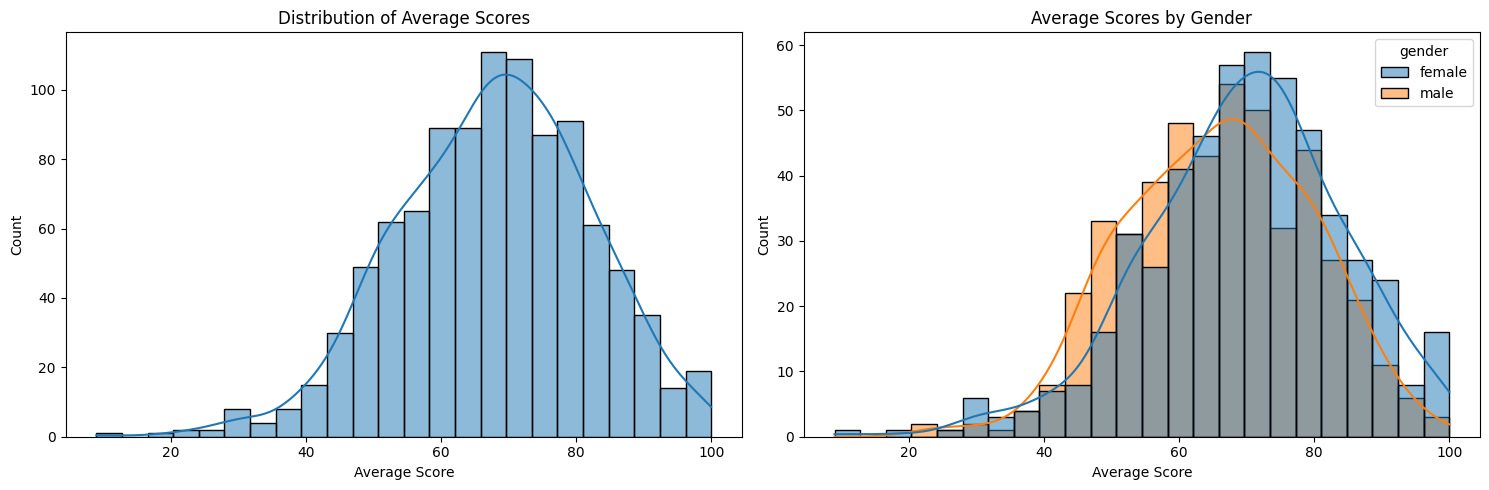

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall distribution
sns.histplot(data=data,    x='average',    kde=True,    ax=axes[0])
axes[0].set_title('Distribution of Average Scores')
axes[0].set_xlabel('Average Score')
axes[0].set_ylabel('Count')

# Gender-wise distribution
sns.histplot(
    data=data,
    x='average',
    hue='gender',
    kde=True,
    ax=axes[1]
)
axes[1].set_title('Average Scores by Gender')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()


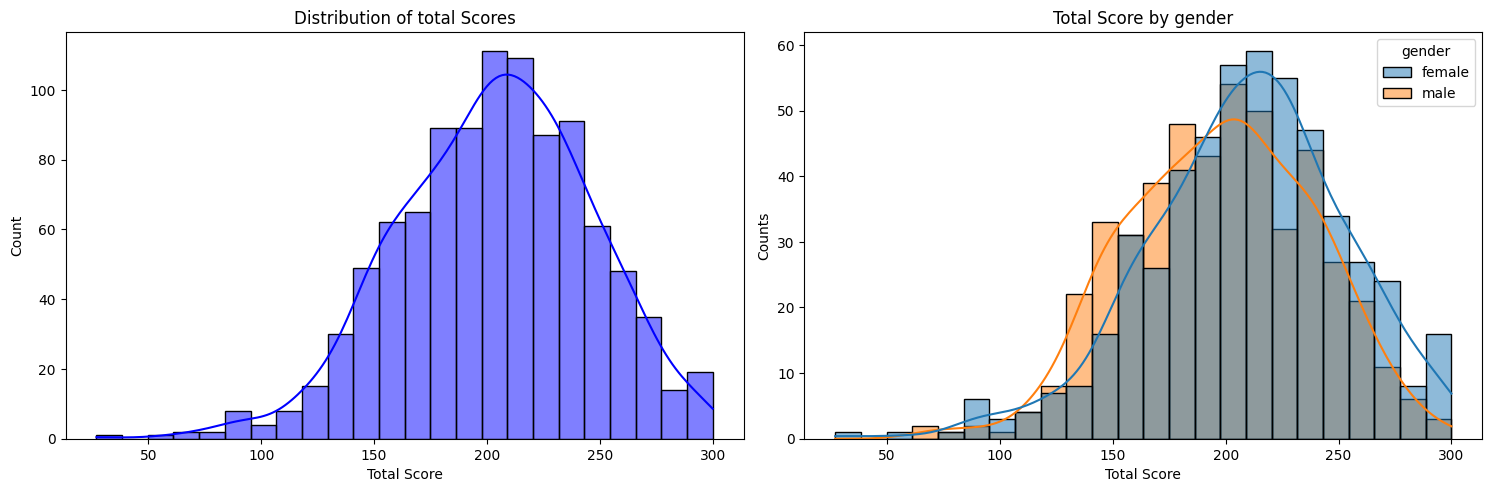

In [17]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=data,x  = 'total_score',kde=True,ax=axes[0],color='blue')
axes[0].set_title("Distribution of total Scores")
axes[0].set_xlabel("Total Score")
axes[0].set_ylabel("Count")

sns.histplot(data=data,x='total_score',ax= axes[1],kde=True,hue='gender')
axes[1].set_title('Total Score by gender')
axes[1].set_xlabel("Total Score")
axes[1].set_ylabel("Counts")

plt.tight_layout(pad=1)
plt.show()

#### Insights
- female students tend to perform well than male students

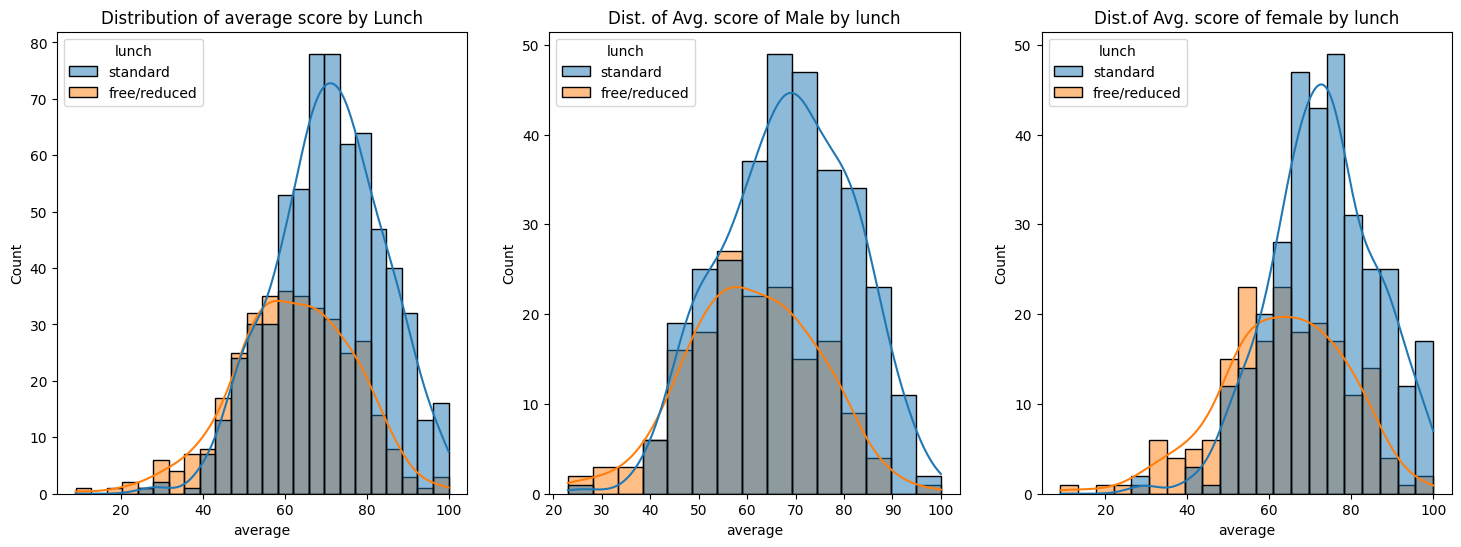

In [18]:
### average score and lunch
hue_order = ['standard', 'free/reduced']

fig, axes =plt.subplots(1,3,figsize=(18,6))
axes[0].set_title("Distribution of average score by Lunch")
sns.histplot(data=data,x='average',ax=axes[0],hue='lunch',color='rainbow',hue_order=hue_order,kde=True)

axes[1].set_title("Dist. of Avg. score of Male by lunch")
sns.histplot(data=data[data['gender']=='male'],x='average',hue='lunch',ax=axes[1],hue_order=hue_order,kde=True)

axes[2].set_title("Dist.of Avg. score of female by lunch")
sns.histplot(data=data[data['gender']=='female'],x='average',ax=axes[2],hue='lunch',hue_order=hue_order,kde=True)

plt.show()



Insights:
- the student to get standard lunch will score well overall across all gender.

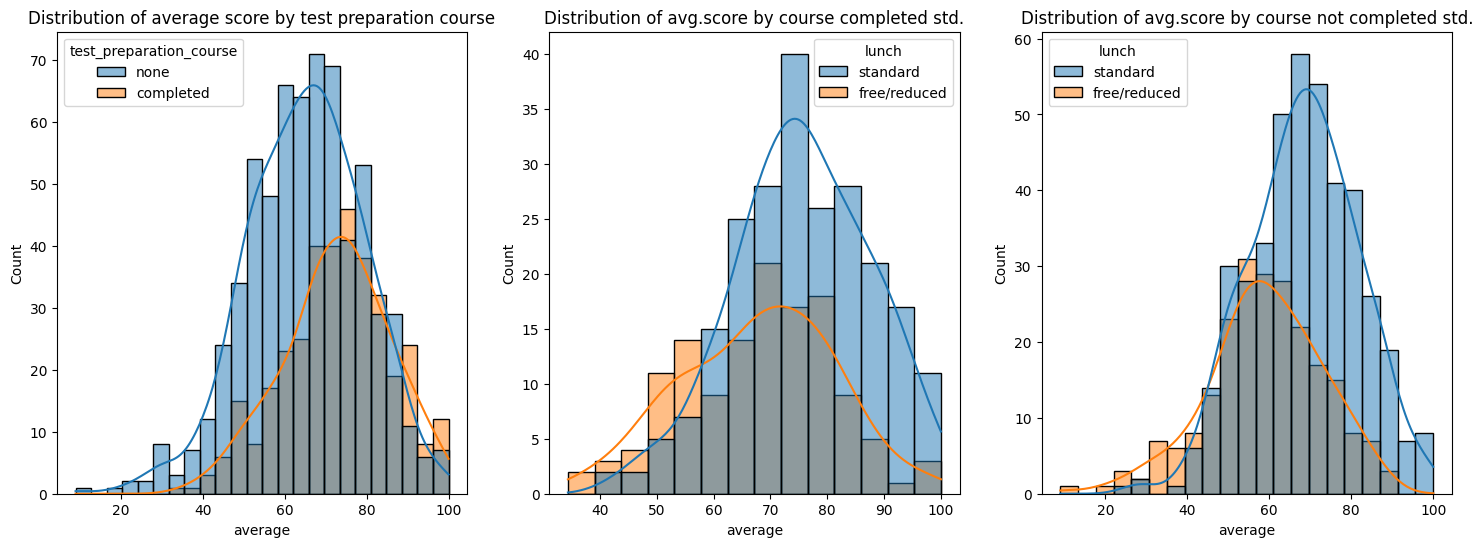

In [19]:
# check'Test prepareation course' featfure and 'average score' relation
fig, axes = plt.subplots(1,3,figsize=(18,6))

axes[0].set_title("Distribution of average score by test preparation course")
sns.histplot(data = data,x = 'average',hue='test_preparation_course',ax=axes[0],kde=True)

axes[1].set_title("Distribution of avg.score by course completed std.")
sns.histplot(data=data[data['test_preparation_course']=='completed'],x='average',ax=axes[1],kde=True,hue='lunch')

axes[2].set_title("Distribution of avg.score by course not completed std.")
sns.histplot(data=data[data['test_preparation_course']=='none'],x='average',kde=True,hue='lunch',ax=axes[2])
plt.show()



Insights:
- students who completed theire syllabus before exam have perform well in exam.
- the count of 'test_preparation_course' == completed is less than who did not completed.

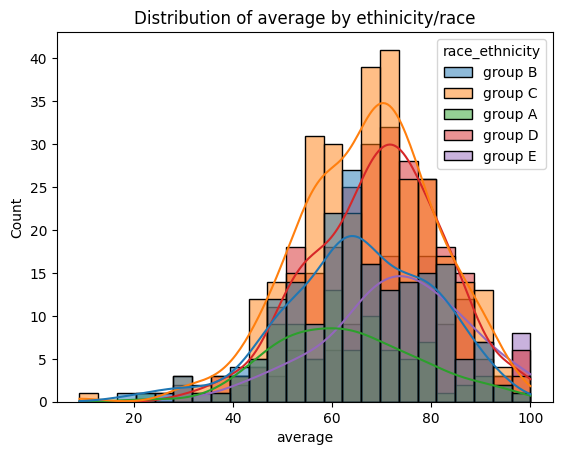

In [20]:
sns.histplot(data=data,x='average',hue='race_ethnicity',kde=True)
plt.title("Distribution of average by ethinicity/race")
plt.show()

In [21]:
summary = (
    data
    .groupby('race_ethnicity')['average']
    .agg(count='count', mean='mean', median='median')
    .sort_values(by='mean', ascending=False)
)
summary

,count,mean,median
race_ethnicity,,,
group E,140,72.752381,73.500000
group D,262,69.179389,70.000000
group C,319,67.131661,68.333333
group B,190,65.468421,65.000000
group A,89,62.992509,61.333333


Insights:
- the E race_ethnicity student have score high.
- where D, C & B ethnicity student perform averagly.
-  and A group student score are below average.

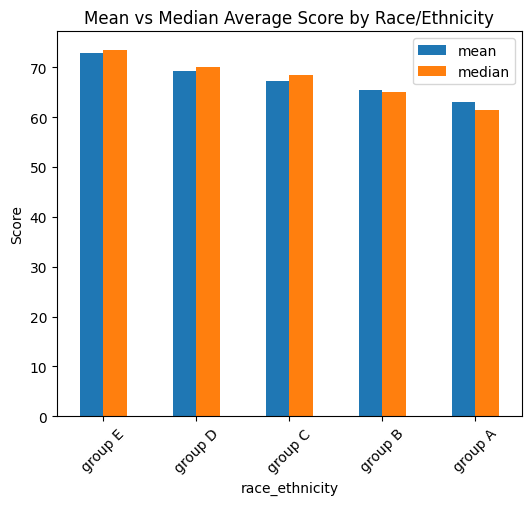

In [30]:
summary[['mean', 'median']].plot(
    kind='bar',
    figsize=(6,5)
)
plt.title("Mean vs Median Average Score by Race/Ethnicity")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [37]:
## parental_level_of_education
data.groupby('parental_level_of_education')['total_score'].agg(count='count',mean='mean',median='median').sort_values('mean',ascending=False)

,count,mean,median
parental_level_of_education,,,
master's degree,59,220.796610,220.0
bachelor's degree,118,215.771186,213.5
associate's degree,222,208.707207,209.0
some college,226,205.429204,206.0
some high school,179,195.324022,200.0
high school,196,189.290816,195.0


In [39]:
data.groupby('parental_level_of_education')['total_score'].agg(size='size',mean='mean')

,size,mean
parental_level_of_education,,
associate's degree,222,208.707207
bachelor's degree,118,215.771186
high school,196,189.290816
master's degree,59,220.796610
some college,226,205.429204
some high school,179,195.324022


In [40]:
temp = data.copy()

In [57]:
temp.loc[145,'total_score']=np.nan

In [58]:
temp.isna().sum()

gender                          0
race_ethnicity                  0
parental_level_of_education     0
lunch                           0
test_preparation_course         0
math_score                      0
reading_score                   0
writing_score                   0
total_score                    10
average                         0
dtype: int64

In [60]:
#this sell demontrat the difference between 'count' and 'size' method.
### count-'return the total non null records count.
### size - return the all records counts including null.
temp.groupby('parental_level_of_education')['total_score'].agg(size='size',count='count')

,size,count
parental_level_of_education,,
associate's degree,222,220
bachelor's degree,118,117
high school,196,195
master's degree,59,59
some college,226,221
some high school,179,178


In [61]:
from scipy.stats import kruskal

groups = [
    group["total_score"].values
    for _, group in data.groupby("parental_level_of_education")
]

stat, p_value = kruskal(*groups)

print("Kruskal-Wallis statistic:", stat)
print("p-value:", p_value)


Kruskal-Wallis statistic: 44.728375524989985
p-value: 1.6475581789021656e-08
